<h1>Stochastic Subspace Identification (SSI) of a Linear 4-DOF System</h1>

This example covers identification of a linear, 4-dof system of a simple simulated wind turbine parkerd with non-flexible boundaty conditions. The ssicov algorithm is used to estimate the state-space matrices. 
This example requires to have the file 'utils.py' in the same folder to call the functions. 


## Table of Contents

* [Introduction](#1)
* [Set up the linear system](#2)
* [Modal parameters of the linear system](#3)
* [Discrete time simulation](#4)
* [Identification using SSI-Cov](#5)
* [Stabilisation Diagram](#6)


### Introduction <a class="anchor" id="1"></a>

Practical implementations of Stochastic Subspace Identification (SSI) are concerned with identification of discrete time systems having the form as seen in lecture 3 of the course:


$\mathbf{z}[k+1] = \mathbf{Az}[k]+\mathbf{w}[k]\\$
$\mathbf{x}[k] = \mathbf{Cz}[k]+\mathbf{v}[k]$

where $\mathbf{z}$ and $\mathbf{x}$ are the state and output vectors, $\mathbf{A}$ and $\mathbf{C}$ are the are the discrete state matrix and output matrix, $\mathbf{w}$ and $\mathbf{v}$  and  are the state noise and output noise processes consisting of unmeasured Gaussian white noise.

The objective of SSI is to determine the system matrices $\mathbf{A}$ and $\mathbf{C}$ using only the measured output sequences $\mathbf{x}_{k}$ by making certain assumptions about the statistical properties of $\mathbf{w}$ and $\mathbf{v}$.



### Set up the 4 dof system linear system  <a class="anchor" id="2"></a>

Four accelerations responses were recorded on the turbine tower. The wind turbine can be then simulated as 4-dof mass-spring-damper system where measurements were taken in the tower $m_1=m_2=m_3=m_4= 100kg$ , the stiffness $k_1=k_2=k_3=k_4= 10000 Nm^{-1}$ and the dampind coefficients $c_1=c_2=c_3=c_4= 10 N(ms)^{-1}$. It is also assumend that he turbine is parked and the boundary conditions bellow the sea level are not flexible, so it is simplified to be fixed below sea level. 


<img src="windturbine.png" width="280">




The equations of motion for the acceleration  at each dof location are:


$
\ddot{x_1}(t)=\frac{1}{m_{1}}\left(-k_{1}x_{1}-c_{1}\dot{x_{1}}+k_{2}(x_{2}-x_{1})+c_{2}(\dot{x_{2}}-\dot{x_{1}})\right)\\
\ddot{x_2}(t)=\frac{1}{m_{2}}\left(k_{2}(x_{1}-z_{2})+c_{2}(\dot{x_{1}}-\dot{x_{2}})+k_{3}(x_{3}-x_{2})+c_{3}(\dot{x_{3}}-\dot{x_{2}})\right)\\
\ddot{x_3}(t)=\frac{1}{m_{3}}\left(k_{3}(x_{2}-x_{3})+c_{3}(\dot{x_{2}}-\dot{x_{3}})+k_{4}(x_{4}-x_{3})+c_{4}(\dot{x_{4}}-\dot{x_{3}})\right)\\
\ddot{x_4}(t)=\frac{1}{m_{4}}\left(k_{4}(x_{3}-x_{4})+c_{4}(\dot{x_{3}}-\dot{x_{4}})\right)
$

Rearranging the equations into state space form $\dot{\mathbf{z}}=\mathbf{Az}$ gives:

$
\left[\matrix{
\dot{x_1}\cr
\dot{x_2}\cr
\dot{x_3}\cr
\dot{x_4}\cr
\ddot{x_1}\cr
\ddot{x_2}\cr
\ddot{x_3}\cr
\ddot{x_4}
}\right]
=
\left[\matrix{
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0\cr
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0\cr
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0\cr
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1\cr
\frac{-k_1-k_2}{m_1} & \frac{k_2}{m_1} & 0 & 0 & \frac{-c_1-c_2}{m_1} & \frac{c_2}{m_1} & 0 & 0\cr
\frac{k_2}{m_2} & \frac{-k_2-k_3}{m_2} & \frac{k_3}{m_2} & 0 & \frac{c_2}{m_2} & \frac{-c_2-c_3}{m_2} & \frac{c_3}{m_2} & 0\cr 0 & \frac{k_3}{m_3} & \frac{-k_3-k_4}{m_3} & \frac{k_4}{m_3} & 0 & \frac{c_3}{m_3} & \frac{-c_3-c_4}{m_3} & \frac{c_4}{m_3}\cr
0 & 0 & \frac{k_4}{m_4} & \frac{-k_4}{m_4} & 0 & 0 & \frac{c_4}{m_4} & \frac{-c_4}{m_4}
}\right]
\left[\matrix{
{x_1}\cr
{x_2}\cr
{x_3}\cr
{x_4}\cr
\dot{x_1}\cr
\dot{x_2}\cr
\dot{x_3}\cr
\dot{x_4}
}\right]
$



Then, the continuous time state matrix $\mathbf{A_c}$.







In [1]:
import numpy as np

m = 10 * np.ones(4)
k = 10000 * np.ones(4)
c = 10 * np.ones(4)

Ac = np.array([
    [0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 1],
    [-k[0] - k[1], k[1], 0, 0, -c[0] - c[1], c[1], 0, 0] / m[0],
    [k[1], -k[1] - k[2], k[2], 0, c[1], -c[1] - c[2], c[2], 0] / m[1],
    [0, k[2], -k[2] - k[3], k[3], 0, c[2], -c[2] - c[3], c[3]] / m[2],
    [0, 0, k[3], -k[3], 0, 0, c[3], -c[3]] / m[3]
])


In this case the discrete time state matrix $\mathbf{A}$ can be found using the matrix exponential, $\mathbf{A}=e^{\mathbf{A}_cT}$, where $T$ is the sampling period of the discrete system. The response was then obtained solving the homogenous solution $\mathbf{x}_h(t)$ from the equation below 

$\mathbf{x}(t)=\underbrace{e^{\mathbf{A}t}\mathbf{x}_0}_{x_h(t)}+\underbrace{\int^t_0e^{\mathbf{A}(t-\tau)}\mathbf{B}\mathbf{u}(\tau)d\tau}_{x_p(t)}$


For a sampling frequency of $f_s=50\mathrm{~Hz}$, the sampling period is $T=0.02\mathrm{~s}$.

In [2]:
import numpy as np
from scipy.linalg import expm

fs = 50         # Sampling Frequency 
T = 1 / fs      # Sampling period

# Compute the matrix exponential A
A = expm(Ac * T)


If the accelerations of each location are taken as the measured output of the system, the output matrix $\textbf{C}$ is given as the last four rows of $\textbf{A}_c$ as they represent the accelerations:


In [3]:
C = Ac[4:, :]

Then, the matrix $\mathbf{A}$ and $\mathbf{C}$ are defined from the simulation above. 

### Theoretical Modal parameters of the linear system (Benchmark) <a class="anchor" id="3"></a>


The modal parameters of the simulated state space system can be determined from the system matrices $\mathbf{A}$ and $\mathbf{C}$ by doing eigenvalue decomposition and calculating the continuous time system poles $\lambda_n$ follwng the equations below: 

$
\mathbf{A}=\mathbf{V\Lambda V}^{\top}\\
\mathbf{\Phi}=\mathbf{CV}\\
\lambda_n=\frac{\ln(\mu_n)}{T}\\
f_n=\frac{|\lambda_n|}{2\pi}\\
\zeta_n=-\frac{\mathrm{Re}(\lambda_n)}{|\lambda_n|}
$

where $\mathbf{V}$ and $\mathbf{\Lambda}$ are the matrices containing the eigenvectors and eigenvalues $\Lambda_n$ of the state matrix $\mathbf{A}$, $\mathbf{\Phi}$ is the matrix containing the mode shape vectors $\mathbf{\phi}_n$, $f_n$ are the natural frequencies (in Hz), and $\zeta_n$ are the modal damping ratios for $n$-modes.

The function 'modalparams', that can be found in 'utils.py' file, calculates the modal parameters with complex-conjugate paired mode shapes eliminated and the modal parameters sorted in ascending frequency.





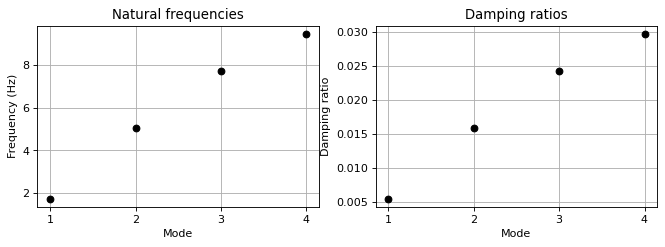

In [4]:
import matplotlib.pyplot as plt
import numpy as npe
from utils import *


fn, zeta, Phi = modalparams(A, C, T)

#List fn, zeta

fnl = fn[0].tolist()
zetal = zeta[0].tolist()

# Create an array for the x-axis
modes = np.arange(1, len(fnl) + 1)

# Plot natural frequencies
fig = plt.figure(figsize=(10, 3), dpi=80)

plt.subplot(121)
plt.plot(modes, fnl,  'o', color='black')
plt.xlabel('Mode')
plt.ylabel('Frequency (Hz)')
plt.xticks(np.arange(1, len(fnl) + 1))
plt.title('Natural frequencies')
plt.grid(True)

# Plot damping ratios
plt.subplot(122)
plt.plot(modes, zetal,  'o', color='black')
plt.xlabel('Mode')
plt.ylabel('Damping ratio')
plt.xticks(np.arange(1, len(zetal) + 1))
plt.title('Damping ratios')
plt.grid(True)


Now, we plot the mode shapes using 'plotBuildingModes' funtion in 'utils.py'

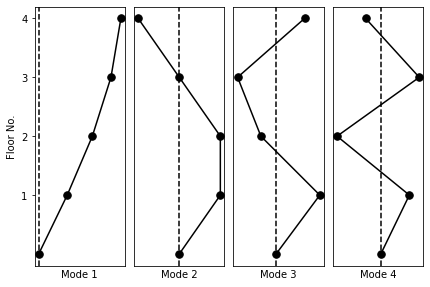

In [5]:
# Plot the mode shapes
plotBuildingModes(Phi[0])  # When [-] specify the model order considerared. In here is [0] as there is not other model order

### Discrete time simulation <a class="anchor" id="4"></a>

For SSI the purposes, white noise is input to each of measurement locations. This is only for simulation purposes, in general the resposnes will be measured and the noise will be embeded due to the operational loading.  

Simulate the system for 100 seconds and set the state noise and output noise processes $\mathbf{w}$ and $\mathbf{v}$ to pull from random normal distributions.


In [6]:
import numpy as np
import matplotlib.pyplot as plt

T = 0.02  # Define the time step T


t = np.arange(0, 100, T)  # Generate time vector t from 0 to 100 with time step T

## Now selecting the rigth rows of the output matrix 
num_rows_C = C.shape[0]   # Get the number of rows in C
num_columns_t = len(t)    # Get the length of vector t

# Create Y filled with zeros
Y = np.zeros((num_rows_C, num_columns_t))

np.random.seed(1)
v = 1e-2 * np.random.randn(A.shape[0], len(t))
w = 1e-3 * np.random.randn(C.shape[0], len(t))
x = np.zeros(A.shape[0])

# Simulate the system iteratively
for i in range(len(t)):
    Y[:, i] = np.dot(C, x) + w[:, i]   # Acceleration responses into a matrix by rows
    x = np.dot(A, x) + v[:, i]

Once the simualted time series are obtained, we plot the time histories as well as the power spectrums of the output using  welch function.

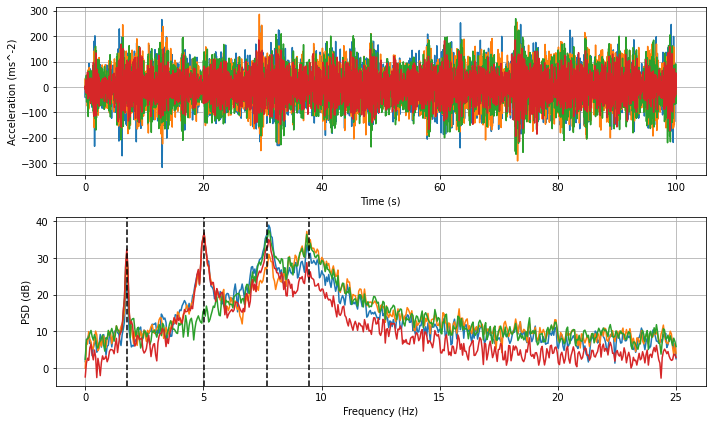

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

fs = 50  # Sample rate (Hz)

# Calculate PSD using the Welch method
(freq, SSY)= welch(Y, fs, nperseg=1024)

# Plot the time history
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t, Y.T)
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (ms^-2)')
plt.axis('tight')
#plt.xlim(0,100)
plt.grid(True)
plt.subplot(2, 1, 2)
for i in range(SSY.shape[0]):
    plt.plot(freq, 10 * np.log10(SSY[i]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (dB)')
plt.axis('tight')
plt.grid(True)

# Overlay natural frequencies as vertical lines on the PSD plot
yl = plt.ylim()
for fn_val in fn[0]:  # Assuming fn is a 2D numpy array, use fn[0] to access the first row
    plt.axvline(x=fn_val, color='k', linestyle='--')

plt.tight_layout()
plt.show()


As expected, the time histories appear to be masked by white noise. The power spectrums; however, reveal four peaks that roughly correspond to the calculated natural frequencies .

### Identification Using SSI-cov <a class="anchor" id="5"></a>

In this section we will use the ssicov algorithm to identify the state space system from the simulated data.
Specify the maximum model order as 20 and use twice as many time lags as the model order for identification purposes.

In [8]:
# Selecting the parameters for SSI-COV

order = 20     # it correspond to n in the lecture notes 
s = 2*order    # it corresponds to i the number of lags 
dt = T         # sampling period 
fs = 50        # sampling frequency

Call ssicov function on the output data where Y: Sensor data matrix, order: Desired maximum model order to identify (scalar), s: Number of block rows in the block Hankel matrix; should be at least ceil(order/ns) to obtain results up to the desired model order. Generally, s > order, fs : float Sampling frequency [Hz] of the `data` time series and ts: float, optional time lag [s] for covariance calculation. Defaults to 5. s

In [9]:
A_cov, C_cov, G_cov, R0 = ssicov(Y, order, s, fs, ts = 5)

Forming block Hankel matrix...
Performing singular value decomposition...
SSI-cov finished.


ssicov returns cell arrays for the system matrices, where the index of each cell array corresponds to the model order.


### Stabilisation Diagram <a class="anchor" id="6"></a>

Create a stabilization diagram using the function 'plot_stabilization_diagram' to aid in selection of stable poles and model order. Use a stabilization criteria of 1% error in frequency, 5% error in damping, and 98% confidence in mode shape vectors.

No stabilization criteria specified, using default settings for stabilization criteria


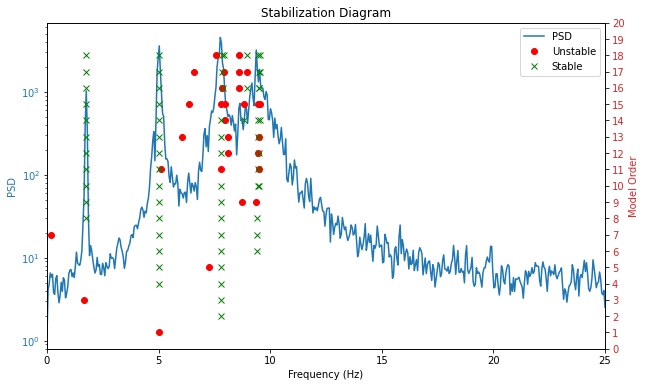

In [14]:
IDs = plot_stabilization_diagram(A_cov, C_cov, Y, fs, dt, order, win=None, err=None)

Looking at the stabilisation diagram, we can observe that for model order 8 the four modes are stable. Then, the estimated natural frquencies and damping rations from SSI-Cov are below. 

In [11]:
fn_cov, zeta_cov, Phi_cov = modalparams(A_cov[8], C_cov[8], T)

print("fn:\n", fn_cov)
print("zeta:\n", zeta_cov)

fn:
 [array([1.75524791, 1.75524791, 5.01414973, 7.77897461, 9.39114193,
       9.39114193])]
zeta:
 [array([0.0046944 , 0.0046944 , 0.01138898, 0.01657947, 0.02845443,
       0.02845443])]


Now we plot the mode shapes of the model order in consideration 

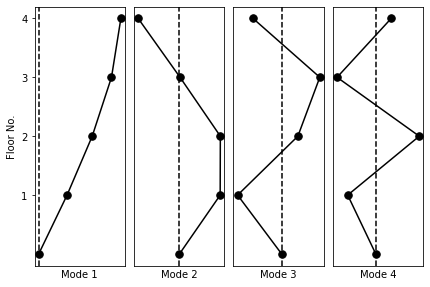

In [12]:
fn_cov, zeta_cov, Phi_cov = modalparams(A_cov, C_cov, T)
plotBuildingModes(Phi_cov[8][:, IDs[8]])